# Customer Churn Prediction: Data Cleaning
In this notebook, we will focus on cleaning the customer churn dataset to ensure it is ready for further analysis and modeling.
## Key Steps in this Notebook:
- Handle missing data for both numerical and categorical columns.
- Correct data types to ensure each feature that the appropriate data type.
- Detect and handle outliers in numerical features.
- Remove any duplicate records to avoid data redundancy.

### Load Libraries and Dataset

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
try:
    df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found.")

# Display the first few rows of the dataset
df.head()

Dataset loaded successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Identify Missing Data

In [29]:
# Find number and percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Show result in dataframe
missing_data = pd.DataFrame({"Missing_values":missing_values,"Percentage":missing_percentage})
print(missing_data)

"""
If more than zero we can sort those by percentage
missing_data = missing_data[missing_data["Missing_values"]>0].sort_values(by="Percentage",ascending=False)
"""

                  Missing_values  Percentage
customerID                     0         0.0
gender                         0         0.0
SeniorCitizen                  0         0.0
Partner                        0         0.0
Dependents                     0         0.0
tenure                         0         0.0
PhoneService                   0         0.0
MultipleLines                  0         0.0
InternetService                0         0.0
OnlineSecurity                 0         0.0
OnlineBackup                   0         0.0
DeviceProtection               0         0.0
TechSupport                    0         0.0
StreamingTV                    0         0.0
StreamingMovies                0         0.0
Contract                       0         0.0
PaperlessBilling               0         0.0
PaymentMethod                  0         0.0
MonthlyCharges                 0         0.0
TotalCharges                   0         0.0
Churn                          0         0.0


'\nIf more than zero we can sort those by percentage\nmissing_data = missing_data[missing_data["Missing_values"]>0].sort_values(by="Percentage",ascending=False)\n'

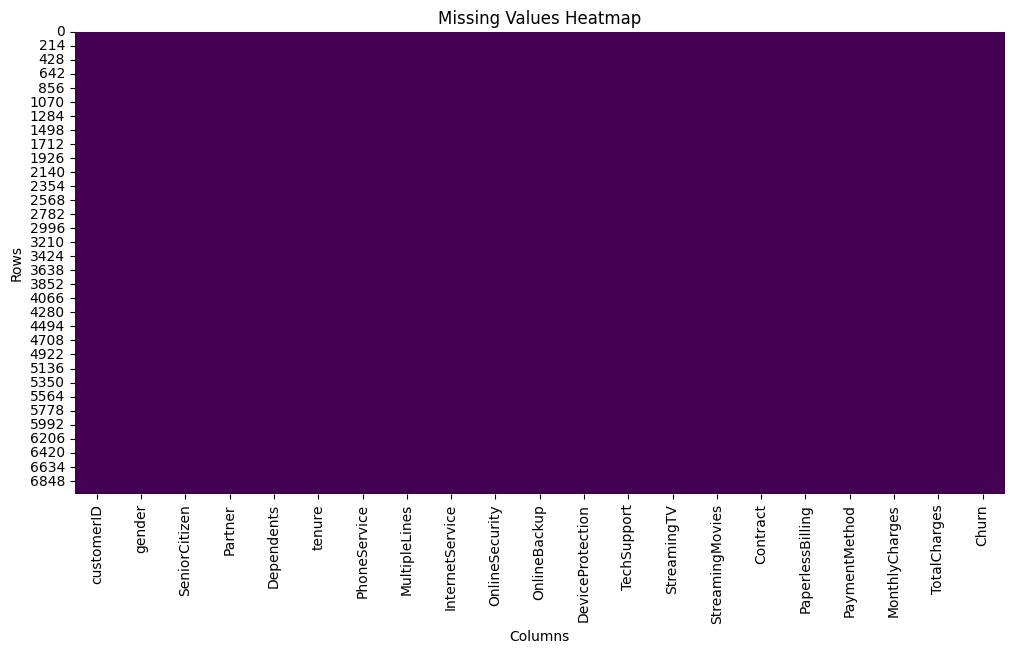

In [30]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

### Handle Missing Data
Although we do not have any missing values in out dataset, we will still show the implementation of how we could handle missing values if we had some.

#### Numeric Columns
For numerical columns, we will fill missing values with the median since it is more robust to outliers than the mean.


In [31]:
# Covert "TotalCharges" to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print(df["TotalCharges"].dtype)

# We will assume this columns has missing value
# Fill missing values in "TotalCharges" with the median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
print(df["TotalCharges"].isnull().sum())

float64
0


C:\Users\dell\AppData\Local\Temp\ipykernel_960\1143301255.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


#### Categorical Columns
For categorical columns with missing value, we will fill them with mode (most frequent category)

In [32]:
# Fill missing values for categorical columns with mode
categorical_columns = df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

### Correct Data Types
It is essential to make sure that all columns have the correct data types, especially after handling missing values.

In [33]:
# Convert binary categorical columns to boolean
binary_columns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling","Churn"]
for col in binary_columns:
    df[col] = df[col].map({"Yes":1, "No":0}) # keep in mind for Yes or yes
df.dtypes
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Handle Outliers
we will identify and cap outliers in numerical columns

#### Visualizing Outliers
Boxplots help visualize outliers in the data.

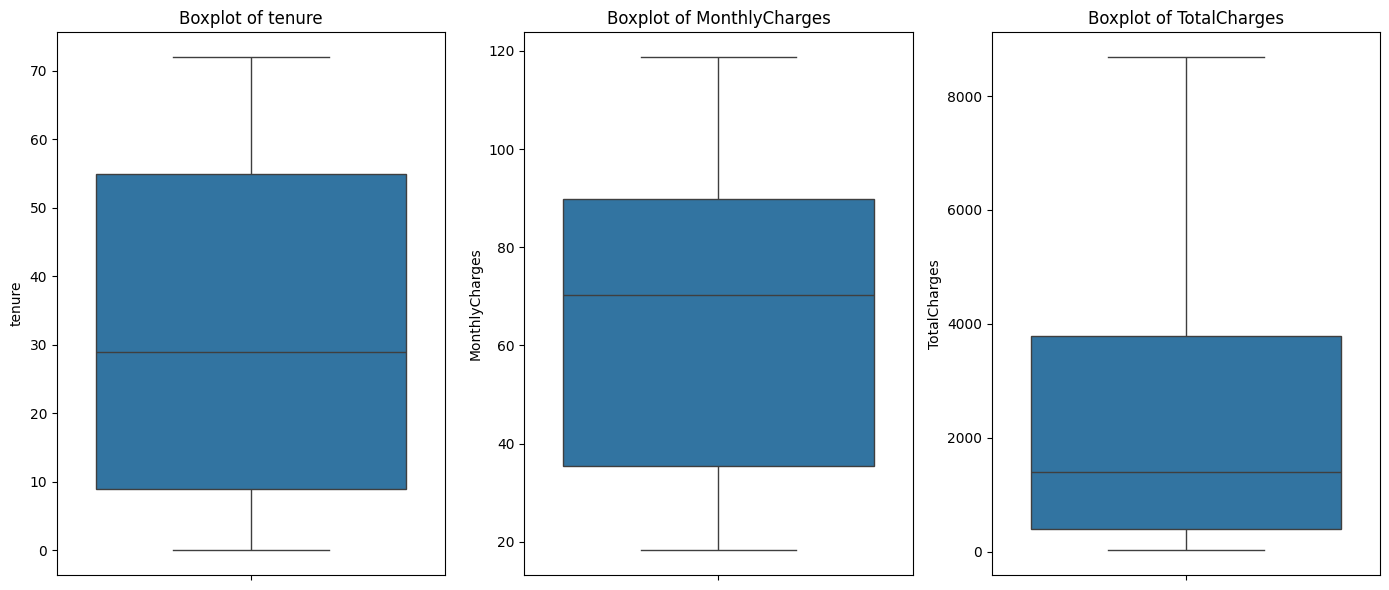

In [34]:
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(14, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


#### Cap Outliers


In [35]:
# Cap outliers at the 1st and 99th percentiles for numerical features
for col in numerical_columns:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

### Remove Duplicates

In [38]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(df.duplicated())
print(f"Number of duplicated rows: {duplicates}")

# Drop duplicate rows, if any
df.drop_duplicates(inplace=True)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool
Number of duplicated rows: 0


### Final Sanity Check

In [41]:
# Check for any remaining missing values
print(f"Missing values remaining: {df.isnull().sum().sum()}")

# Verify that the data types are correct
print(df.dtypes)

# Display the final cleaned dataset's shape and preview the data
print(f"Dataset shape after cleaning: {df.shape}")

Missing values remaining: 0
customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
Dataset shape after cleaning: (7043, 21)


### Save Cleaned Dataset

In [49]:
# Save the cleaned dataset

try:
    df.to_csv("../data/processed/cleaned_customer_churn.csv", index=False)
    print("Cleaned dataset saved successfully.")
except:
    print("Error: Check the path properly.")


Cleaned dataset saved successfully.


### Summary of Cleaning Process
- **Missing Data Handling**: Missing values in `TotalCharges` (numerical) were filled with the median, and categorical columns were filled with the mode.
- **Data Type Correction**: Binary categorical columns were converted to boolean (0/1).
- **Outlier Handling**: Outliers in numerical columns (`tenure`, `MonthlyCharges`, `TotalCharges`) were capped at the 1st and 99th percentiles.
- **Duplicate Removal**: No duplicate rows were found in the dataset.
- **Final Dataset**: The cleaned dataset is saved and ready for the next step in the pipeline.